### What are the most demanded skills for the top 3 most popular data roles?

Methodology : 
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings


In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
# Load the dataset
dataset=load_dataset("lukebarousse/data_jobs")
df= pd.DataFrame(dataset['train'])
#creating a copy of the original dataset so it stays uneffected
df1=df.copy()
#datetime filtering 
df1['job_posted_date']=pd.to_datetime(df1['job_posted_date'])
#seperating the month
df1['month']=df1['job_posted_date'].dt.month
#writing a function to convert the job_skills column from strings to lists
def clean_list(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    else:
        return job_skills
    
df1['job_skills']=df1['job_skills'].apply(clean_list)

In [8]:
#filtering out the top 3 roles 

top3_roles=df1['job_title_short'].value_counts().head(3).index.to_list()

In [12]:
#creating another dataframe by filtering and making a copy of the original dataframe so as to not affect the actual dataframe
df1_top3=df1[df1['job_title_short'].isin(top3_roles)].copy()

In [15]:
# exploding it to sepreate out the skills individually 

df1_top3=df1_top3.explode('job_skills')

In [18]:
# finding out the most demanded skills - i.e. the skills with max number of occurences
df1_top3['job_skills'].value_counts().head()

job_skills
sql        284540
python     278923
r          102217
aws         97352
tableau     94666
Name: count, dtype: int64

In [19]:
#the above is a mix for all three roles - DA,DS,DE - so we need to filter out the top 10 skills for each role
top3_skills_da=df1_top3[df1_top3['job_title_short']=='Data Analyst']['job_skills'].value_counts().head()
top3_skills_ds=df1_top3[df1_top3['job_title_short']=='Data Scientist']['job_skills'].value_counts().head()
top3_skills_de=df1_top3[df1_top3['job_title_short']=='Data Engineer']['job_skills'].value_counts().head()

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_16076\2347659566.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top3_skills_da.index, x=top3_skills_da.values ,ax=axs[0], orient='h', palette='dark:r', edgecolor='black')
C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_16076\2347659566.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top3_skills_ds.index, x=top3_skills_ds.values,ax=axs[1], orient='h', palette='dark:r', edgecolor='black')
C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_16076\2347659566.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


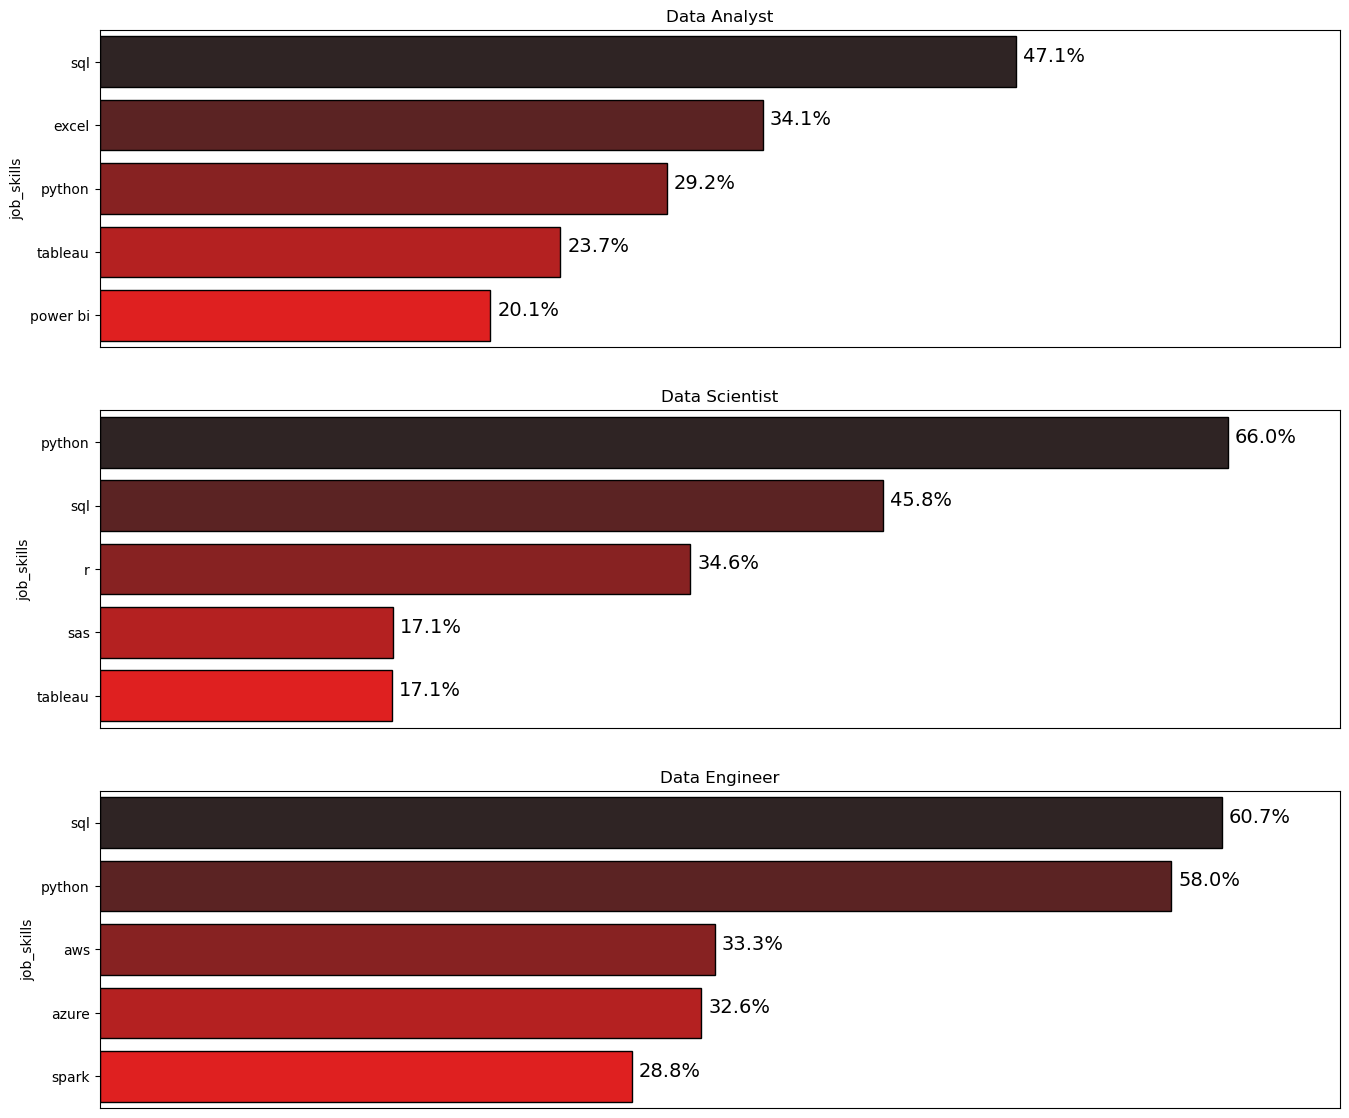

In [79]:
#plotting the graphs for the same with seaborn

#creating the subplots
fig, axs=plt.subplots(3,1,figsize=(16,14))

# sepereate code for each subplot

#data analyst 

da_total=df1[df1['job_title_short']=='Data Analyst'].shape[0]
sns.barplot(y=top3_skills_da.index, x=top3_skills_da.values ,ax=axs[0], orient='h', palette='dark:r', edgecolor='black')
axs[0].set_title('Data Analyst')
axs[0].set_xticks([]) ## to not show the values on x axis 
axs[0].set_xlim(0,125_000)
for i, value in enumerate(top3_skills_da.values):
    percentage = (value / da_total) * 100
    axs[0].annotate(f'{percentage:.1f}%', (value + 700, i), ha='left', fontsize=14)


    
# data scientist 

ds_total=df1[df1['job_title_short']=='Data Scientist'].shape[0]
sns.barplot(y=top3_skills_ds.index, x=top3_skills_ds.values,ax=axs[1], orient='h', palette='dark:r', edgecolor='black')
axs[1].set_title('Data Scientist')
axs[1].set_xticks([])
axs[1].set_xlim(0,125_000)
for i, value in enumerate(top3_skills_ds.values):
    percentage = (value / ds_total) * 100
    axs[1].annotate(f'{percentage:.1f}%', (value + 700, i), ha='left', fontsize=14)


# data engineer

de_total=df1[df1['job_title_short']=='Data Engineer'].shape[0]
de_total=df1[df1['job_title_short']=='Data Engineer'].shape[0]
sns.barplot(y=top3_skills_de.index, x=top3_skills_de.values,ax=axs[2], orient='h', palette='dark:r', edgecolor='black')
axs[2].set_title('Data Engineer')
axs[2].set_xticks([])
axs[2].set_xlim(0,125_000)
for i, value in enumerate(top3_skills_de.values):
    percentage = (value / de_total) * 100
    axs[2].annotate(f'{percentage:.1f}%', (value + 700, i), ha='left', fontsize=14)
    
    